# SEM MRes 2021
## 03-ASE-GPAW-Phonons

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
import ase # The Atomic Simulation Environment

In [3]:
from ase.spacegroup import crystal

# https://materialsproject.org/materials/mp-2998/
#atoms = crystal("BaTiO3", basis=[(0,0,0),(0.5,0.5,0.5),(0.5,0.5,0)],
#                spacegroup=221, size=1, 
#                cellpar=[4.036,4.036,4.036, 90,90,90])

atoms = crystal("CsPbI3", basis=[(0,0,0),(0.5,0.5,0.5),(0.5,0.5,0)],
                spacegroup=221, size=1, 
                cellpar=[6.3,6.3,6.3, 90,90,90])

# Here 'size' gives you the supercell expanion, so size=1 is just a unit cell, 
# size=2 is a 2x2x2 supercell and so on. Making a larger supercell can help with 
# the visualisation below, but try not to run a calculation on this, as the effort scales as N^3 !

In [4]:
print(atoms)

Atoms(symbols='CsPbI3', pbc=True, cell=[6.3, 6.3, 6.3], spacegroup_kinds=...)


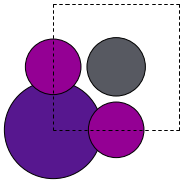

In [5]:
# Alternatively, rather than have an interactive 3D visualisation, 
# let's use the ase.write function to output a PNG (picture)
from ase.io import write
write('image.png', atoms)

# And then use a bit of iPython magic to pull this image back into the browser
from IPython.display import Image
Image("image.png")

# Hawk! A unit cell.

In [6]:
# Let's boot up GPAW: https://wiki.fysik.dtu.dk/gpaw/
from gpaw import GPAW, PW

# Reciprocal space / Brillouin Zone / k-space sampling information:
#  https://wiki.fysik.dtu.dk/gpaw/documentation/manual.html#brillouin-zone-sampling

# Rather than an ab-initio DFT method, 
# we are going to use a LCAO (linear combination of atomic orbitals) approximation.
# This keeps the calculation requirements modest, for you to be able to do this in a lab.
# Feel free to revist here and 'turn the dials up' to get a publication-quality result.
calc=GPAW(mode='lcao', kpts=[2,2,2], symmetry='off')
# NOTE: we need to turn symmetry OFF (slowing down the calculation), as when the Phonon 
# code starts moving the atoms, this will, by definition, break any symmetry of the unit cell.

# ALSO: we are using a much lighter k-point sampling (of the Brillouin Zone)
# This is because: 
#  A) We have to - our calculations are much more heavy
#  B) We can get away with it - energies and forces converge much faster than band structure


# The below uses PW (Plane Wave) mode with a Kinetic Energy cut-off (basis set size)
# xc = exchange correlation functional, in this case PBE (a good starting point for semiconductors)
#calc=GPAW(mode=PW(200),
#            kpts=[4,4,4],
#            xc='PBE',
#            convergence={'bands': 5})



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  21.6.0
 |___|_|             

User:   jupyter@orac
Date:   Tue Nov  2 15:02:35 2021
Arch:   x86_64
Pid:    28711
Python: 3.9.7
gpaw:   /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/gpaw
_gpaw:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/
        _gpaw.cpython-39-x86_64-linux-gnu.so
ase:    /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase (version 3.21.1)
numpy:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/numpy (version 1.21.3)
scipy:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/scipy (version 1.7.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  kpts: [2 2 2]
  mode: lcao
  symmetry: off



In [7]:
# Phonon specific code
from ase.phonons import Phonons
atoms.calc = calc

# Phonon calculator
N = 2
ph = Phonons(atoms, calc, supercell=(N, N, N), delta=0.05)
ph.run()

# This will take a while to run! We need to do the calculation in a supercell 
# (the 'N' expansion above) and this means that the O(N^3) scaling DFT codes 
# are massive slowed down.
#
# Then, we are calculating the force-constants on the atoms by doing a finite 
# displacement of the individual atoms - so each atom is moved by dx, dy, dz in turn. 
# 
# The files are being stored in a subfolder called 'phonons'; you should be able to 
# see the individual files being generated if you go back in jupyter and have a look 
# in your folder

In [8]:
# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)

In [9]:
#ph.clean()
# delete temporary files! Otherwise it will try and use them as a cache. 
# You need to do this if e.g. you want to change the structure, or do a different calculation method.

CUB(a=6.3)
  Variant name: CUB
  Special point names: GXRM
  Default path: GXMGRX,MR

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    X   0.0000  0.5000  0.0000
    R   0.5000  0.5000  0.5000
    M   0.5000  0.5000  0.0000



/home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase/dft/bz.py:60: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase/dft/bz.py:51: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  zs3d, renderer.M)


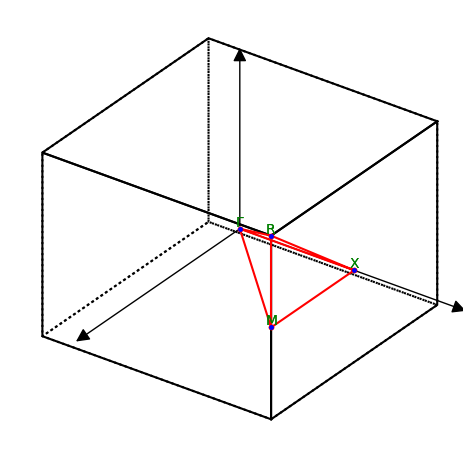

<Axes3DSubplot:>

In [10]:
# OK! Let's ask ASE for a suggested high-symmetry path through the Brillouin Zone.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

In [11]:
# Choose path through vibrational Brillouin-Zone
path = atoms.cell.bandpath('GXMGRX,MR', npoints=100)
# Walk path & generate band structure
bs = ph.get_band_structure(path)

# Get Density of States
dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 6 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.648e-02*i)
WARNING, 6 imaginary frequencies at q = ( 0.00,  0.04,  0.00) ; (omega_q = 4.648e-02*i)
WARNING, 6 imaginary frequencies at q = ( 0.00,  0.08,  0.00) ; (omega_q = 4.642e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.00,  0.12,  0.00) ; (omega_q = 4.623e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.00,  0.17,  0.00) ; (omega_q = 4.588e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.00,  0.21,  0.00) ; (omega_q = 4.545e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.00,  0.25,  0.00) ; (omega_q = 4.497e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.00,  0.29,  0.00) ; (omega_q = 4.450e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.00,  0.33,  0.00) ; (omega_q = 4.404e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.00,  0.38,  0.00) ; (omega_q = 4.363e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.00,  0.42,  0.00) ; (omega_q = 4.329e-02*i)
WARNING, 4 imaginary frequencies

WARNING, 4 imaginary frequencies at q = (-0.33, -0.08, -0.12) ; (omega_q = 3.741e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08, -0.08) ; (omega_q = 3.545e-02*i)
WARNING, 5 imaginary frequencies at q = (-0.33, -0.08, -0.03) ; (omega_q = 3.441e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.03) ; (omega_q = 3.438e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.07) ; (omega_q = 3.669e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.12) ; (omega_q = 4.037e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.18) ; (omega_q = 4.462e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.22) ; (omega_q = 4.872e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.28) ; (omega_q = 5.226e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.32) ; (omega_q = 5.505e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.33, -0.08,  0.38) ; (omega_q = 5.702e-02*i)
WARNING, 4 imaginary frequencies

WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.47) ; (omega_q = 5.783e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.42) ; (omega_q = 5.604e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.38) ; (omega_q = 5.334e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.33) ; (omega_q = 4.984e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.28) ; (omega_q = 4.593e-02*i)
WARNING, 5 imaginary frequencies at q = (-0.12, -0.42, -0.22) ; (omega_q = 4.305e-02*i)
WARNING, 5 imaginary frequencies at q = (-0.12, -0.42, -0.17) ; (omega_q = 4.228e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.12) ; (omega_q = 4.237e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.08) ; (omega_q = 4.262e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42, -0.03) ; (omega_q = 4.283e-02*i)
WARNING, 4 imaginary frequencies at q = (-0.12, -0.42,  0.03) ; (omega_q = 4.296e-02*i)
WARNING, 4 imaginary frequencies

WARNING, 3 imaginary frequencies at q = ( 0.03,  0.22,  0.38) ; (omega_q = 4.257e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.22,  0.43) ; (omega_q = 4.425e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.22,  0.47) ; (omega_q = 4.603e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.47) ; (omega_q = 5.096e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.42) ; (omega_q = 5.167e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.38) ; (omega_q = 5.155e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.33) ; (omega_q = 5.057e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.28) ; (omega_q = 4.884e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.22) ; (omega_q = 4.674e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.17) ; (omega_q = 4.527e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.03,  0.28, -0.12) ; (omega_q = 4.473e-02*i)
WARNING, 4 imaginary frequencies

WARNING, 4 imaginary frequencies at q = ( 0.22, -0.03, -0.33) ; (omega_q = 5.206e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.22, -0.03, -0.28) ; (omega_q = 5.045e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.22, -0.03, -0.22) ; (omega_q = 4.838e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03, -0.17) ; (omega_q = 4.594e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03, -0.12) ; (omega_q = 4.320e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03, -0.08) ; (omega_q = 4.022e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03, -0.03) ; (omega_q = 3.702e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03,  0.03) ; (omega_q = 3.459e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03,  0.07) ; (omega_q = 3.421e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03,  0.12) ; (omega_q = 3.554e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.22, -0.03,  0.18) ; (omega_q = 3.883e-02*i)
WARNING, 4 imaginary frequencies

WARNING, 4 imaginary frequencies at q = ( 0.43, -0.42, -0.03) ; (omega_q = 5.995e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.43, -0.42,  0.03) ; (omega_q = 6.008e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.43, -0.42,  0.07) ; (omega_q = 6.031e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.43, -0.42,  0.12) ; (omega_q = 6.063e-02*i)
WARNING, 4 imaginary frequencies at q = ( 0.43, -0.42,  0.18) ; (omega_q = 6.103e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.43, -0.42,  0.22) ; (omega_q = 6.149e-02*i)
WARNING, 6 imaginary frequencies at q = ( 0.43, -0.42,  0.28) ; (omega_q = 6.204e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.43, -0.42,  0.32) ; (omega_q = 6.264e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.43, -0.42,  0.38) ; (omega_q = 6.321e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.43, -0.42,  0.43) ; (omega_q = 6.360e-02*i)
WARNING, 5 imaginary frequencies at q = ( 0.43, -0.42,  0.47) ; (omega_q = 6.382e-02*i)
WARNING, 5 imaginary frequencies

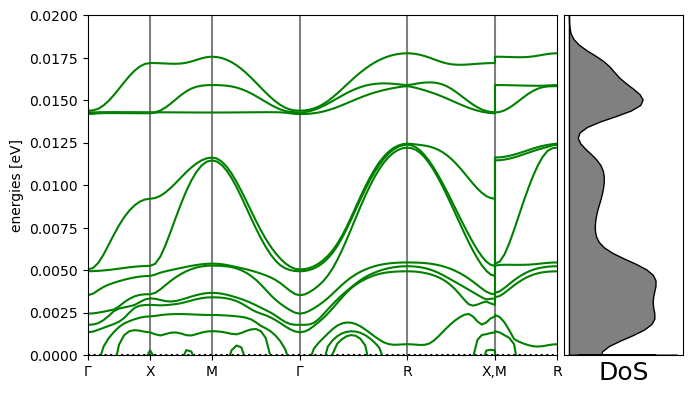

In [12]:
# Plot the band structure and DOS:
import numpy as np

fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.020
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(np.ndarray.flatten(dos.weights), np.ndarray.flatten(dos.energy), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DoS", fontsize=18)

plt.show()
